# EXPERIAN PROJECT

Mosaic UK 7 Grand Index (xlsx)	A document containing one of the segmentations from Experian. You can find key features for the different segments and percent separation by given criteria.
Google analytics simulation (xlsx)	A csv containing a few events to be observed in the second part of the challenge simulating the real data from Google Analytics.


1.	Use the questionnaire responses (Survey data) to determine the type of person who is most likely to be interested in test driving an EV.  This will be your target audience
2.	Using the Mosaic UK 7 Grand Index, find the “Group Type(s)” most similar to your targeted audience. What key characteristics do your Group Type(s) share and what areas are they most likely to be living in? Calculate how many prospects are likely to be arriving at BMW’s website and how much it will cost
3.	Using the Google analytics data to identify 3 different buckets (groups). 
i.	Non Prospects
ii.	Prospects for re-targeting
iii.	Prospects for a later campaign


### Data Exploration

In [39]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the google anlaytics data  using the panda library
google_data = pd.read_excel("Experian Step Up Google Analytics Data.xlsx")

In [3]:
#reading the mosiac dataset  using the panda library
mosiac_data= pd.read_excel("Experian Step Up Mosaic UK 7 Grand Index.xlsx",sheet_name='Grand Index - Means')

In [4]:
#reading the survey dataset using the panda library
survey_data = pd.read_excel("Experian Step Up Survey Data.xlsx")

In [5]:
#checking the 5 columns of the google analytic data
google_data.sample(5)

,Client ID,Sessions,Average Session Duration,Bounce Rate,Event 1,Event 2,Event 3,Event 1 Conversion Rate,Event 2 Conversion Rate,Event 3 Conversion Rate
5805,8513929468,7,00:00:23,0.428571,3,1,0,0.428571,0.142857,0.0
19609,7818171979,3,00:01:50,0.000000,1,3,0,0.333333,1.000000,0.0
6719,9231562060,9,00:00:37,0.111111,7,7,0,0.777778,0.777778,0.0
14999,5319740394,2,00:00:07,0.000000,0,2,0,0.000000,1.000000,0.0
17470,7368332163,5,00:00:12,0.000000,0,3,0,0.000000,0.600000,0.0


In [6]:
#checking the 10 columns of the mosiac data
mosiac_data.head(6)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Grand Index - Means,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Category,Topic,Variable,National Means,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
3,People & family,Gender,Male,49.40597,51.366965,50.560933,49.48479,48.282209,45.252609,50.725982,49.355448,47.901428,45.431331,50.906169,50.716792,43.543192,51.665916,52.647866,54.623107
4,People & family,Gender,Female,50.59403,48.633035,49.439067,50.51521,51.717791,54.747391,49.274018,50.644552,52.098572,54.568669,49.093831,49.283208,56.456808,48.334084,47.352134,45.376893
5,People & family,Age,Mean age of heads of household,54.264764,48.822031,61.412665,62.8161,56.003362,77.3707,59.303618,46.494777,38.434044,43.360929,38.131196,52.537174,74.635221,60.373471,57.583628,39.589706


In [21]:
survey_data.head(10)

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
0,Jennifer,Burton,female,18-24,Bristol,"£15k-£19,999",Subaru,No,Yes,Yes,No,Yes,£90000-£100K,Yes,No,Yes
1,Matthew,Corbyn,male,55-64,London,"£50k-£59,999",Skoda,Yes,Yes,Yes,Yes,Yes,£120K-£150K,No,No,Yes
2,Paul,Harris,prefer not to say,25-34,London,"£15k-£19,999",Jeep,Yes,Yes,No,No,No,£90000-£100K,No,Yes,No
3,Andrew,Taylor,prefer not to say,45-54,Liverpool,£100k+,Subaru,Yes,No,Yes,Yes,No,£120K-£150K,Yes,No,Yes
4,Joshua,O'Connor,male,35-44,Priston,"£20k-£29,999",Honda,Yes,Yes,No,No,No,£10000-£20000,Yes,No,No
5,Thomas,Swift,male,35-44,Morpeth,"£60k-£69,999",Honda,No,Yes,Yes,Yes,Yes,£10000-£20000,No,Yes,Yes
6,Andrew,Walsh,prefer not to say,35-44,Longport,"£15k-£19,999",Land Rover,No,Yes,Yes,Yes,Yes,£70000-£80000,No,No,Yes
7,Taylor,Knowles,female,45-54,Exeter,"£30k-£39,999",Land Rover,Yes,Yes,No,No,Yes,£80000-£90000,No,Yes,Yes
8,Pamela,Hall,prefer not to say,65 and over,Priston,"£40k-£49,999",Peugeot,No,Yes,Yes,Yes,Yes,£90000-£100K,Yes,No,No
9,Lily,Foster,female,45-54,Morpeth,"£70k-£99,999",Audi,Yes,Yes,No,Yes,Yes,£120K-£150K,No,Yes,No


### Data Cleaning for Mosiac DataSet

In [7]:
#renaming the moniac columns 
mosiac_data=mosiac_data.rename(columns={'Unnamed: 0' :'Category','Unnamed: 1':'Topic','Unnamed: 2':'Variable',
                            'Unnamed: 3':'National_means','Unnamed: 4':'A','Unnamed: 5':'B','Unnamed: 6':'C','Unnamed: 7':'D'
                           ,'Unnamed: 8':'E','Unnamed: 9':'F','Unnamed: 10':'F','Unnamed: 11':'G','Unnamed: 12':'H','Unnamed: 13':'I'
                           ,'Unnamed: 14':"J",'Unnamed: 15':'K','Unnamed: 16':'L','Unnamed: 17':'M','Unnamed: 18':'N','Unnamed: 19':'O'})

In [14]:
cleaned_mosiac.tail(6)

,Category,Topic,Variable,National_means,A,B,C,D,E,F,F,G,H,I,J,K,L,M,N
804,What we drive (own),Model R–V,Volkswagen Golf,1.286831,5.140043,1.576196,2.932712,0.84242,2.113158,0.697369,6.135366,0.678705,0.500396,0.419072,0.954127,0.404355,0.201353,0.096695,0.526916
805,What we drive (own),Model R–V,Volkswagen Jetta,1.682352,6.753942,4.088569,3.85319,1.853324,2.359836,1.106904,4.256217,1.079416,1.214568,0.324871,1.18424,0.505882,0.485229,0.165762,0.553337
806,What we drive (own),Model R–V,Volkswagen Passat,1.983508,6.797665,6.579078,6.849985,3.360215,2.950151,1.520303,1.285586,1.329861,0.673001,0.706505,0.475193,0.442865,0.217858,0.110508,0.3163
807,What we drive (own),Model R–V,Volkswagen Tiguan,1.217929,9.140711,1.906144,2.380425,0.541421,0.886899,0.341923,3.943963,0.257958,0.109264,0.103862,0.606151,0.084022,0.019805,0.007893,0.345741
808,What we drive (own),Model R–V,Volvo XC60,1.796893,17.045601,3.504204,4.089717,0.575496,0.293732,0.28397,0.464161,0.117709,0.079177,0.096616,0.765172,0.068268,0.029708,0.009867,0.052843
809,What we drive (own),Model R–V,Volvo XC90,1.76024,17.674443,3.697005,2.888436,0.861351,0.359322,0.177723,0.59919,0.227905,0.144101,0.091785,0.512609,0.07702,0.03961,0.057227,0.07096


In [13]:
## removing the empty columns in the data
cleaned_mosiac= mosiac_data.drop(index=[0,1,2])    # removing the first 3 inrelevant data and spaces in the dataset
cleaned_mosiac= mosiac_data.drop(index=[810,811])  #removing the inrelivant data at the the end of the dataset


### Use the questionnaire responses (Survey data) to determine the type of person who is most likely to be interested in test driving an EV. This will be your target audience

#### checking the survey data for duplicates, and Null
- Observation
* The survey data have no null in the dataset
* The survery data have no duplicated dataset
* There are 16 object columns in the dataset


In [18]:
#reading the data to check for duplicate and nan
print('Duplicated dataset =',survey_data.duplicated().sum())
survey_data.isnull().sum()

Duplicate dataset = 0


first_name                   0
last_name                    0
gender                       0
age                          0
town                         0
income_band                  0
preferred_make               0
owns_car                     0
has_drivers_license          0
decision_maker               0
intent_on_buying             0
has_ongoing_lease            0
target_price_range           0
has_used_electric_vehicle    0
requests_test_drive          0
has_driveway                 0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

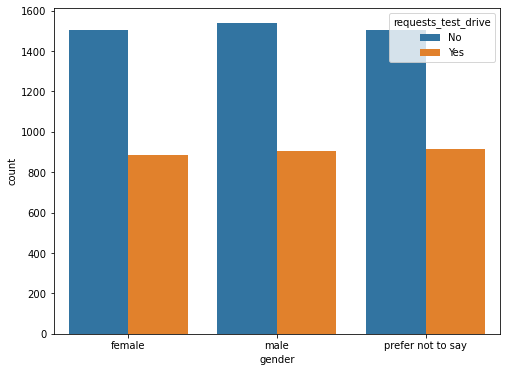

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=survey_data, x="gender", hue="requests_test_drive")

<AxesSubplot:xlabel='age', ylabel='count'>

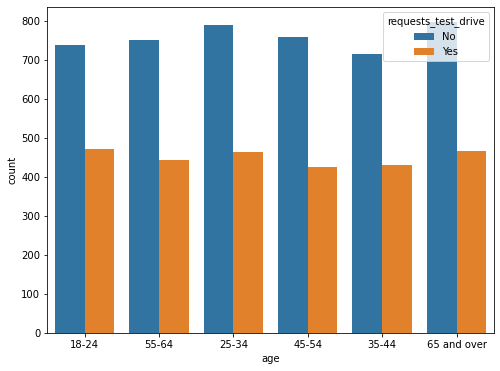

In [41]:
# Create a box plot or violin plot
plt.figure(figsize=(8, 6))
sns.countplot(data=survey_data, hue="requests_test_drive", x="age")  # Or sns.violinplot()

In [19]:
#check the data type if it matches with the dataset
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 7250 non-null   object
 1   last_name                  7250 non-null   object
 2   gender                     7250 non-null   object
 3   age                        7250 non-null   object
 4   town                       7250 non-null   object
 5   income_band                7250 non-null   object
 6   preferred_make             7250 non-null   object
 7   owns_car                   7250 non-null   object
 8   has_drivers_license        7250 non-null   object
 9   decision_maker             7250 non-null   object
 10  intent_on_buying           7250 non-null   object
 11  has_ongoing_lease          7250 non-null   object
 12  target_price_range         7250 non-null   object
 13  has_used_electric_vehicle  7250 non-null   object
 14  requests

In [13]:
print(survey_data.columns)


Index(['first_name', 'last_name', 'gender', 'age', 'town', 'income_band',
       'preferred_make', 'owns_car', 'has_drivers_license', 'decision_maker',
       'intent_on_buying', 'has_ongoing_lease', 'target_price_range',
       'has_used_electric_vehicle', 'requests_test_drive', 'has_driveway'],
      dtype='object')


In [14]:
print(google_data.columns)


Index(['Client ID', 'Sessions', 'Average Session Duration', 'Bounce Rate',
       'Event 1', 'Event 2', 'Event 3', 'Event 1 Conversion Rate',
       'Event 2 Conversion Rate', 'Event 3 Conversion Rate'],
      dtype='object')


In [15]:
print(mosiac_data.columns)

Index(['Variable', 'National_means', 'A', 'B', 'C', 'D', 'E', 'F', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype='object')


In [16]:
#checking for duplicates and null values in the survey datase
survey_data.isnull().sum()
survey_data.duplicated().sum()

0

In [17]:
#checking for duplicates and null values in the google analystics datase


In [18]:
Observation
- The survey dataset have no duplicate and there are no null values in the data

SyntaxError: invalid syntax (<ipython-input-18-5e5eabb14667>, line 2)